In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import xarray as xr

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
WG_5 = xr.open_dataset("/content/drive/MyDrive/TRABAJO TÉCNICAS 2/DATOS T[ECNICAS 2/WGLC/wglc_climatology_05m.nc")
WG_5

<xarray.Dataset>
Dimensions:  (lon: 4320, lat: 2160, time: 12)
Coordinates:
  * lon      (lon) float64 -180.0 -179.9 -179.8 -179.7 ... 179.8 179.9 180.0
  * lat      (lat) float64 -89.96 -89.88 -89.79 -89.71 ... 89.79 89.88 89.96
  * time     (time) object 0000-01-01 00:00:00 ... 0000-12-01 00:00:00
Data variables:
    density  (time, lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.8
    title:        WWLLN Global Lightning Climatology, climatological mean (20...
    contact:      jed.kaplan@arve-research.com
    source_data:  WWLLN AE georeferenced stroke counts, corrected for detecti...
    node_offset:  1
    DOI:          https://doi.org/10.5281/zenodo.6007052

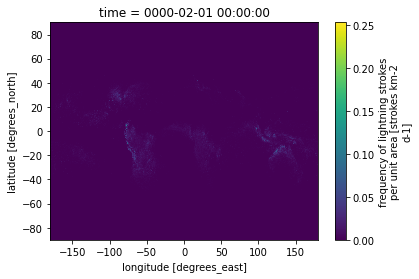

In [ ]:
WG_5.density[1,:,:].plot()

##shapefiles and crops


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%capture
!pip install geopandas
!pip install rioxarray

In [ ]:
import rioxarray
from geopandas import read_file as gpd_read_file

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [ ]:


!pip install importlib-metadata==4.13
!pip install geopandas
!pip install rasterio
!pip install scipy
import geopandas as gpd
import xarray as xr
import numpy as np
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
shp_peru = gpd.read_file("/content/drive/MyDrive/TRABAJO TÉCNICAS 2/DATOS T[ECNICAS 2/shps/areas naturales del peru/region natural_geogpsperu_JuanPabloSuyoPomalia.shp")
shp_peru.head()

,OBJECTID,GlobalID,Escala,Fuente,Cod_RegNat,Nm_RegNat,SHAPE_Leng,SHAPE_Area,contacto,web,whatsapp,geometry
0,1,{4DB64834-22F3-492A-8461-71DE7B0B6394},0,OFICIO N Â° 287-2016-INEI/DNCE-DECG,2,Sierra,87.894629,31.486141,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"MULTIPOLYGON (((-74.72973 -11.61102, -74.72932..."
1,2,{8F2361F2-9CE0-44F5-8210-D3A8DFAB7A41},0,OFICIO N Â° 287-2016-INEI/DNCE-DECG,3,Selva,92.589739,62.876535,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-69.11407 -14.48779, -69.11434 -14.4..."
2,3,{D2806CDD-429B-4606-A38B-EAB1DFBB7845},0,OFICIO N Â° 287-2016-INEI/DNCE-DECG,1,Costa,75.671063,12.250577,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"MULTIPOLYGON (((-79.80161 -4.48881, -79.80155 ..."


In [ ]:
shp_clim = gpd.read_file("/content/drive/MyDrive/TRABAJO TÉCNICAS 2/DATOS T[ECNICAS 2/shps/shape_clim/peru_koppen_disolv.shp")
shp_clim

,climate,Shape_Leng,Shape_Area,geometry
0,Af Tropical-Rainforest,45.314382,40.064620,"MULTIPOLYGON (((-75.90000 -7.10000, -75.90000 ..."
1,Am Tropical-Monsoon,46.147517,7.644006,"MULTIPOLYGON (((-76.20000 -10.80000, -76.00000..."
2,Aw Tropical-Savanna,42.914560,9.465720,"MULTIPOLYGON (((-70.63936 -10.36133, -70.64033..."
3,BSh Arid-Steppe-Hot,25.657121,2.683530,"MULTIPOLYGON (((-76.10000 -12.80000, -76.00000..."
4,BSk Arid-Steppe-Cold,28.806283,6.897331,"MULTIPOLYGON (((-76.00000 -12.50000, -76.00000..."
5,BWh Arid-Desert-Hot,38.083733,6.786354,"MULTIPOLYGON (((-71.30000 -17.40000, -71.30000..."
6,BWk Arid-Desert-Cold,26.824209,7.979135,"MULTIPOLYGON (((-75.70000 -13.00000, -75.70000..."
7,Cfa Temperate-Withouth_dry_season-Hot_Summer,8.511059,0.892864,"MULTIPOLYGON (((-69.00000 -13.90000, -69.00000..."
8,Cfb Temperate-Withouth_dry_season-Warm_Summer,21.200000,6.430000,"MULTIPOLYGON (((-72.20000 -10.80000, -72.20000..."
9,Cwa Temperate-Dry_Winter-Hot_Summer,1.800000,0.050000,"MULTIPOLYGON (((-69.20000 -13.60000, -69.10000..."


In [ ]:
shp_climsel.index

NameError: ignored

In [ ]:
shp_peru_costa = shp_peru.loc[shp_peru.OBJECTID == 3]

In [ ]:
shp_peru_costa.geometry.values[0]

NameError: ignored

In [ ]:
shp_climsel.columns


Index(['FID_other_', 'identity', 'climate', 'Shape_Leng', 'Shape_Area',
       'geometry'],
      dtype='object')

In [ ]:
shp_clim.iloc[[2]]

,FID_other_,identity,climate,Shape_Leng,Shape_Area,geometry
2,385,27d32e23-af74-0d19-e012-f1650a3fd8d9,Am Tropical-Monsoon,0.6,0.02,"POLYGON ((-76.00000 -10.90000, -76.20000 -10.9..."


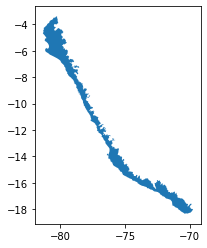

In [ ]:
shp_peru_costa.plot()

In [ ]:
shp_clim.total_bounds

array([-8.13000000e+01, -1.83269177e+01, -6.86852539e+01, -4.17480464e-02])

In [ ]:
def xr_crop(shp_i, netcdf_i):
  
  # get box
  #crop hjace un corte en el cuadrante como un where
  box_i = shp_i.total_bounds# te da el cuadrante del del shapefile 
  
  # crop based on box
  #para utilizar el where
  #se esta definiendo los boxsiuads
  crop_netcdf_i = netcdf_i.where((netcdf_i["longitude"] > box_i[0]) & # min lon
                                 (netcdf_i["longitude"] < box_i[2]) & # max lon
                                 (netcdf_i["latitude"] > box_i[1]) & # min lat
                                 (netcdf_i["latitude"] < box_i[3]), # max lat
                                 drop = True) #es para que se saque todo el area que no nos interesa
  
  return crop_netcdf_i

def xr_shp_to_grid(shp_i, netcdf_array):

  #conversion de shpafile a un  dato grillado 
  
  # get real box
  shp_i_geometry = shp_i.geometry

  # adding crs #creating xarray dataset
  mask = netcdf_array.rio.set_crs(shp_i.crs)

  # "rasterizing"
  #se denomina como rasterización, se hace un clip para un shp determinado
  mask = mask.rio.clip(shp_i_geometry, drop = True)

  # making "True/False" values
  #coinciden los puntos de grilla con los datos del punto de grilla
  mask.values[~np.isnan(mask.values)] = 1 #creo que se cambia de los valores que tienen valores por uno 
  #0 son los que no coincida con los griññadp 
  #1 preserva los puntos de pixles de cada uno de los puntos
  
  return mask.drop(["time"]) #se quita el time y el spatial_ref
#xrcrop :: como el where te hace un corte de un cuadrado
#xr_mask :: corte en base del poligono

#netcdf_i ->dato grillado
#shp_i -> shapefile
#grid mask -> mask
def xr_mask(grid_mask, netcdf_i):
  # masking
  #se hace un crop en base al mask gr
  mask_netcdf_i = netcdf_i.where(grid_mask == True)

  return mask_netcdf_i

In [ ]:
#se accede al dato de la posición 7
shp_exp = shp_peru.iloc[[15]]
#para obtener las coordenadas maximas de latitud y longitud de cada shape
shp_exp.total_bounds

IndexError: ignored

In [ ]:
WG_5=WG_5.rename({"lon":"longitude","lat":"latitude"})

In [ ]:
WG_5.density.isel(time=0)

<xarray.DataArray 'density' (latitude: 2160, longitude: 4320)>
[9331200 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float64 -180.0 -179.9 -179.8 ... 179.8 179.9 180.0
  * latitude   (latitude) float64 -89.96 -89.88 -89.79 ... 89.79 89.88 89.96
    time       object 0000-01-01 00:00:00
Attributes:
    long_name:  frequency of lightning strokes per unit area
    units:      strokes km-2 d-1

cls la diferencia entre isel time= 0  y de [0,:,:]

In [ ]:
#set crs --- set cordenadas geograficas
WG_5.rio.set_crs(shp_peru_costa.crs)
WG_5CRP=xr_crop(shp_i=shp_peru_costa,netcdf_i=WG_5)
#shape to grid
WG_5_grid=xr_shp_to_grid(shp_i = shp_peru_costa, netcdf_array = WG_5.density.isel(time=0))
#make a mask
WG_5MASK=xr_mask(grid_mask=WG_5_grid, netcdf_i=WG_5CRP)


In [ ]:
WG_5MASK

<xarray.Dataset>
Dimensions:      (time: 12, latitude: 179, longitude: 139)
Coordinates:
  * longitude    (longitude) float64 -81.29 -81.21 -81.12 ... -69.88 -69.79
  * latitude     (latitude) float64 -18.29 -18.21 -18.12 ... -3.542 -3.458
  * time         (time) object 0000-01-01 00:00:00 ... 0000-12-01 00:00:00
    spatial_ref  int64 0
Data variables:
    density      (time, latitude, longitude) float32 nan nan nan ... nan nan nan
Attributes:
    Conventions:  CF-1.8
    title:        WWLLN Global Lightning Climatology, climatological mean (20...
    contact:      jed.kaplan@arve-research.com
    source_data:  WWLLN AE georeferenced stroke counts, corrected for detecti...
    node_offset:  1
    DOI:          https://doi.org/10.5281/zenodo.6007052

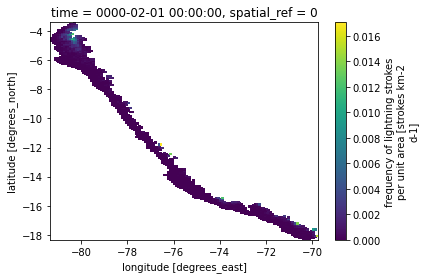

In [ ]:
WG_5MASK.density[1,:,:].plot()

###define piscop and crop

In [ ]:
CC = xr.open_dataset("/content/drive/MyDrive/TRABAJO TÉCNICAS 2/DATOS T[ECNICAS 2/CC.nc")
CC

<xarray.Dataset>
Dimensions:    (longitude: 1422, latitude: 1982, z: 12)
Coordinates:
  * longitude  (longitude) float64 -81.4 -81.39 -81.38 ... -67.21 -67.2 -67.19
  * latitude   (latitude) float64 1.22 1.21 1.2 1.19 ... -18.57 -18.58 -18.59
  * z          (z) int32 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    crs        int32 ...
    variable   (z, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.4
    created_by:   R, packages ncdf4 and raster (version 3.3-13)
    date:         2021-06-17 23:13:15

In [ ]:
CC=CC.rename({"z": "time"})

In [ ]:
shp_peru = gpd.read_file("/content/drive/MyDrive/TRABAJO TÉCNICAS 2/DATOS T[ECNICAS 2/shps/Departamentos.shp")
shp_peru.head()

,DEPCOD,DEPNOM,geometry
0,01,AMAZONAS,"POLYGON ((-77.71584 -5.10859, -77.71561 -5.108..."
1,02,ANCASH,"POLYGON ((-77.43826 -8.41625, -77.43879 -8.419..."
2,03,APURIMAC,"POLYGON ((-73.51174 -13.38481, -73.50822 -13.3..."
3,04,AREQUIPA,"POLYGON ((-71.89395 -14.78905, -71.89342 -14.7..."
4,05,AYACUCHO,"POLYGON ((-73.74697 -13.75935, -73.74495 -13.7..."


In [ ]:
shp_exp

NameError: ignored

In [ ]:
CC.isel(time=1)

In [ ]:
CC=CC.rio.set_crs(shp_peru_costa.crs)
CC

<xarray.Dataset>
Dimensions:    (longitude: 1422, latitude: 1982, time: 12)
Coordinates:
  * longitude  (longitude) float64 -81.4 -81.39 -81.38 ... -67.21 -67.2 -67.19
  * latitude   (latitude) float64 1.22 1.21 1.2 1.19 ... -18.57 -18.58 -18.59
  * time       (time) int32 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    crs        int32 -2147483647
    variable   (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.4
    created_by:   R, packages ncdf4 and raster (version 3.3-13)
    date:         2021-06-17 23:13:15

In [ ]:
CC.variable.isel(time=1)

<xarray.DataArray 'variable' (latitude: 1982, longitude: 1422)>
[2818404 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float64 -81.4 -81.39 -81.38 ... -67.21 -67.2 -67.19
  * latitude   (latitude) float64 1.22 1.21 1.2 1.19 ... -18.57 -18.58 -18.59
    time       int32 2
Attributes:
    grid_mapping:  crs
    proj4:         +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=...
    min:           [20.69000053 17.70000076 10.46000004  7.05000019  1.909999...
    max:           [100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]

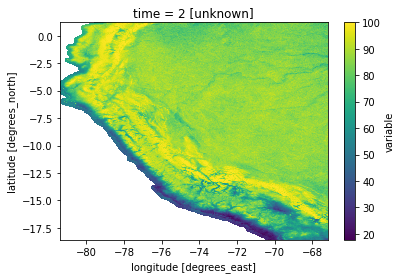

In [ ]:
CC.variable[1,:,:].plot()

In [ ]:
#set crs --- set cordenadas geograficas

# PISCOp_monthly.rio.set_crs(shp_peru_costa.crs)
CC_croped=xr_crop(shp_i=shp_peru_costa,netcdf_i=CC)
#shape to grid
CC_grid=xr_shp_to_grid(shp_i = shp_peru_costa, netcdf_array = CC.variable.isel(time=1))
#make a mask
CC_MASK=xr_mask(grid_mask=CC_grid, netcdf_i=CC_croped)


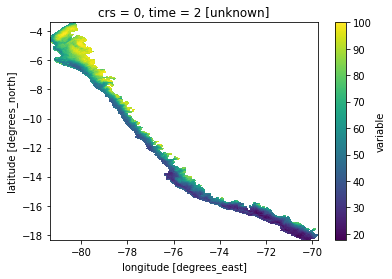

In [ ]:
CC_MASK.variable[1,:,:].plot()

In [ ]:
CC_MASK.variable[1,:,:]

<xarray.DataArray 'variable' (latitude: 1495, longitude: 1157)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    crs        int64 0
  * latitude   (latitude) float64 -3.4 -3.41 -3.42 ... -18.32 -18.33 -18.34
  * longitude  (longitude) float64 -81.32 -81.31 -81.3 ... -69.78 -69.77 -69.76
    time       int32 2
Attributes:
    grid_mapping:  crs
    proj4:         +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=...
    min:           [20.69000053 17.70000076 10.46000004  7.05000019  1.909999...
    max:           [100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]

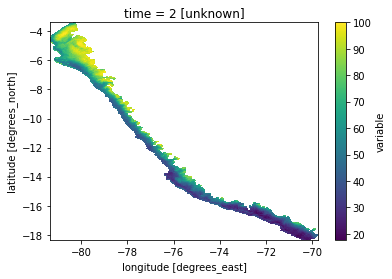

In [ ]:
CC_MASK_wcrs=CC_MASK.drop_vars("crs")
CC_MASK_wcrs.variable[1,:,:].plot()

In [ ]:
# CC_MASK_wcrs["time"]=pd.date_range("1981-01-01", freq='D',periods=13149)

In [ ]:
PISCOp= xr.open_dataset("/content/drive/MyDrive/TRABAJO TÉCNICAS 2/DATOS T[ECNICAS 2/Copy of PISCOp.nc",decode_times=False)

In [ ]:
PISCOp=PISCOp.rename({"X": "longitude", "Y": "latitude", "T": "time"})

In [ ]:
PISCOp

<xarray.Dataset>
Dimensions:    (time: 13149, latitude: 198, longitude: 133)
Coordinates:
  * time       (time) float32 7.672e+03 7.672e+03 ... 2.082e+04 2.082e+04
  * latitude   (latitude) float32 0.95 0.85 0.75 0.65 ... -18.55 -18.65 -18.75
  * longitude  (longitude) float32 -81.25 -81.15 -81.05 ... -68.25 -68.15 -68.05
Data variables:
    Prec       (time, latitude, longitude) float32 ...

In [ ]:
PISCOp["time"]=pd.date_range("1981-01-01", freq='D',periods=13149)

In [ ]:
PISCOp_monthly=PISCOp.Prec.groupby(PISCOp.time.dt.month).mean(dim="time")

In [ ]:
PISCOp_monthly=PISCOp_monthly.rename({"month": "time"})
PISCOp_monthly

<xarray.DataArray 'Prec' (time: 12, latitude: 198, longitude: 133)>
array([[[        nan,         nan,         nan, ...,  8.065328  ,
          5.8954415 ,  5.7553606 ],
        [        nan,         nan,         nan, ...,  8.866757  ,
          6.9347076 ,  6.7378545 ],
        [        nan,         nan,         nan, ..., 10.0538435 ,
          8.421829  ,  7.693599  ],
        ...,
        [        nan,         nan,         nan, ...,  3.2188067 ,
          3.2176409 ,  3.2463317 ],
        [        nan,         nan,         nan, ...,  3.4028096 ,
          3.4031134 ,  3.2004526 ],
        [        nan,         nan,         nan, ...,  3.1168768 ,
          2.876081  ,  2.684616  ]],

       [[        nan,         nan,         nan, ...,  8.763137  ,
          7.0525055 ,  6.8778205 ],
        [        nan,         nan,         nan, ...,  9.4493265 ,
          7.855139  ,  8.170136  ],
        [        nan,         nan,         nan, ..., 10.366322  ,
          8.83083   ,  8.450666  ],
...
        [        nan,         nan,         nan, ...,  0.06128145,
          0.06623014,  0.07389631],
        [        nan,         nan,         nan, ...,  0.0669443 ,
          0.07362427,  0.16573143],
        [        nan,         nan,         nan, ...,  0.16188346,
          0.18414487,  0.18425147]],

       [[        nan,         nan,         nan, ...,  7.980965  ,
         12.847028  , 16.950924  ],
        [        nan,         nan,         nan, ...,  8.994867  ,
         11.84967   , 13.68137   ],
        [        nan,         nan,         nan, ...,  9.251479  ,
          9.83587   ,  9.278994  ],
        ...,
        [        nan,         nan,         nan, ...,  0.90738744,
          0.72322553,  0.7679357 ],
        [        nan,         nan,         nan, ...,  0.65549374,
          0.649575  ,  0.8487416 ],
        [        nan,         nan,         nan, ...,  0.7108525 ,
          0.8001805 ,  0.9644761 ]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 0.95 0.85 0.75 0.65 ... -18.55 -18.65 -18.75
  * longitude  (longitude) float32 -81.25 -81.15 -81.05 ... -68.25 -68.15 -68.05
  * time       (time) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [ ]:
#set crs --- set cordenadas geograficas

PISCOp_monthly=PISCOp_monthly.rio.set_crs(shp_peru_costa.crs)
PPM_croped=xr_crop(shp_i=shp_peru_costa,netcdf_i=PISCOp_monthly)
#shape to grid
PPM_grid=xr_shp_to_grid(shp_i = shp_peru_costa, netcdf_array = PISCOp_monthly.isel(time=1))
#make a mask
PPM_MASK=xr_mask(grid_mask=PPM_grid, netcdf_i=PPM_croped)
PPM_MASK

<xarray.DataArray 'Prec' (time: 12, latitude: 149, longitude: 115)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ..., 0.22402021,
         0.38055453, 0.4857798 ],
        [       nan,        nan,        nan, ..., 0.08710371,
         0.23138408, 0.4091247 ],
        [       nan,        nan,        nan, ..., 0.08329134,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [       nan,        nan,        nan, ..., 0.01495777,
         0.01629731, 0.02020787],
        [       nan,        nan,        nan, ..., 0.01622362,
         0.01843054, 0.02094271],
        [       nan,        nan,        nan, ..., 0.02055657,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ..., 0.03766299,
         0.0442146 , 0.1211319 ],
        [       nan,        nan,        nan, ..., 0.03831816,
         0.04300153, 0.05147333],
        [       nan,        nan,        nan, ..., 0.04023973,
                nan,        nan]]], dtype=float32)
Coordinates:
  * latitude     (latitude) float64 -3.45 -3.55 -3.65 ... -18.05 -18.15 -18.25
  * longitude    (longitude) float32 -81.25 -81.15 -81.05 ... -69.95 -69.85
  * time         (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
    spatial_ref  int64 0

In [ ]:
PPM_MASK

<xarray.DataArray 'Prec' (time: 12, latitude: 136, longitude: 111)>
array([[[        nan,         nan,  3.8690598 , ...,         nan,
                 nan,         nan],
        [        nan,  4.593635  ,  4.7343125 , ...,         nan,
                 nan,         nan],
        [        nan,  5.542778  ,  5.6370897 , ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,  5.6820354 , ...,         nan,
                 nan,         nan],
        [        nan,  8.334943  ,  8.146726  , ...,         nan,
                 nan,         nan],
        [        nan,  9.262465  ,  9.454478  , ...,         nan,
                 nan,         nan],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,  2.689401  , ...,         nan,
                 nan,         nan],
        [        nan,  2.4764445 ,  2.8676045 , ...,         nan,
                 nan,         nan],
        [        nan,  3.0578613 ,  3.0645182 , ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]], dtype=float32)
Coordinates:
  * latitude     (latitude) float32 -4.45 -4.55 -4.65 ... -17.75 -17.85 -17.95
  * longitude    (longitude) float32 -79.85 -79.75 -79.65 ... -68.95 -68.85
  * time         (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
    spatial_ref  int64 0

In [ ]:
WG_5MASK_WSR=WG_5MASK.drop_vars("spatial_ref")

In [ ]:
WG_5MASK_WSR.density[1,:,:]

<xarray.DataArray 'density' (latitude: 179, longitude: 139)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ..., 0.        ,        nan,
               nan],
       [       nan,        nan,        nan, ..., 0.        , 0.00040684,
               nan],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -81.29 -81.21 -81.12 ... -69.96 -69.88 -69.79
  * latitude   (latitude) float64 -18.29 -18.21 -18.12 ... -3.625 -3.542 -3.458
    time       object 0000-02-01 00:00:00
Attributes:
    long_name:  frequency of lightning strokes per unit area
    units:      strokes km-2 d-1

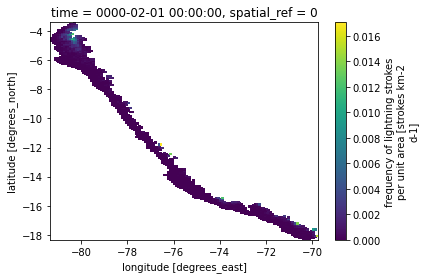

In [ ]:
WG_5MASK.density[1,:,:].plot()

In [ ]:
WG_5MASK_WSR["time"]=np.array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
WG_5MASK_WSR

<xarray.Dataset>
Dimensions:    (time: 12, latitude: 179, longitude: 139)
Coordinates:
  * longitude  (longitude) float64 -81.29 -81.21 -81.12 ... -69.96 -69.88 -69.79
  * latitude   (latitude) float64 -18.29 -18.21 -18.12 ... -3.625 -3.542 -3.458
  * time       (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    density    (time, latitude, longitude) float32 nan nan nan ... nan nan nan
Attributes:
    Conventions:  CF-1.8
    title:        WWLLN Global Lightning Climatology, climatological mean (20...
    contact:      jed.kaplan@arve-research.com
    source_data:  WWLLN AE georeferenced stroke counts, corrected for detecti...
    node_offset:  1
    DOI:          https://doi.org/10.5281/zenodo.6007052

In [ ]:
CC_MASK_interpolated=CC_MASK_wcrs.variable.interp_like(WG_5MASK_WSR,method="nearest")
CC_MASK_interpolated=CC_MASK_interpolated.to_dataset()

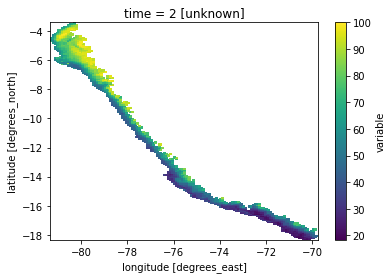

In [ ]:
CC_MASK_interpolated.variable[1,:,:].plot()

In [ ]:
WG_5MASK_WSR

<xarray.Dataset>
Dimensions:    (time: 12, latitude: 179, longitude: 139)
Coordinates:
  * longitude  (longitude) float64 -81.29 -81.21 -81.12 ... -69.96 -69.88 -69.79
  * latitude   (latitude) float64 -18.29 -18.21 -18.12 ... -3.625 -3.542 -3.458
  * time       (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    density    (time, latitude, longitude) float32 nan nan nan ... nan nan nan
Attributes:
    Conventions:  CF-1.8
    title:        WWLLN Global Lightning Climatology, climatological mean (20...
    contact:      jed.kaplan@arve-research.com
    source_data:  WWLLN AE georeferenced stroke counts, corrected for detecti...
    node_offset:  1
    DOI:          https://doi.org/10.5281/zenodo.6007052

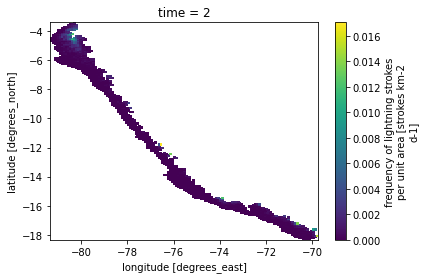

In [ ]:
WG_5MASK_WSR.density[1,:,:].plot()

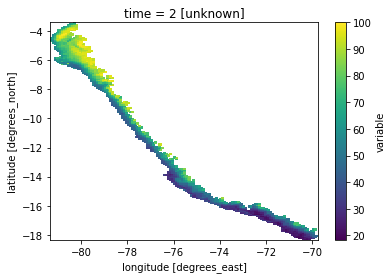

In [ ]:

CC_MASK_interpolated.variable[1,:,:].plot()

In [ ]:

CC_MASK

<xarray.Dataset>
Dimensions:    (time: 12, latitude: 1495, longitude: 1157)
Coordinates:
    crs        int64 0
  * latitude   (latitude) float64 -3.4 -3.41 -3.42 ... -18.32 -18.33 -18.34
  * longitude  (longitude) float64 -81.32 -81.31 -81.3 ... -69.78 -69.77 -69.76
  * time       (time) int32 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    variable   (time, latitude, longitude) float32 nan nan nan ... nan nan nan
Attributes:
    Conventions:  CF-1.4
    created_by:   R, packages ncdf4 and raster (version 3.3-13)
    date:         2021-06-17 23:13:15

In [ ]:
def cor_point_grid2(x, y):
  res = pd.DataFrame({"x":x.ravel(),"y":y.ravel()})
  res = res.corr().to_numpy()[0,1]
  return res

In [ ]:
cor_field_field_space = xr.apply_ufunc(cor_point_grid2,
                                       CC_MASK_interpolated.variable,
                                       WG_5MASK_WSR,
                                       input_core_dims=[["latitude","longitude"], ["latitude","longitude"]], #e hace la correlacion por cada lugar en el espacio 
                                       vectorize=True)
cor_field_field_space

<xarray.Dataset>
Dimensions:  (time: 12)
Coordinates:
  * time     (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    density  (time) float64 0.08929 0.3217 0.4603 ... 0.2678 0.2249 0.1748

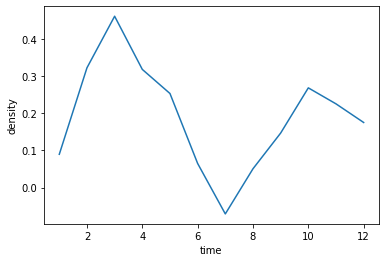

In [ ]:
cor_field_field_space.density.plot()

In [ ]:
cor_field_field_space_costa=cor_field_field_space.to_dataframe()
cor_field_field_space_costa.to_csv("correlación_costa.csv")

In [ ]:
cor_field_field_space["time"]

<xarray.DataArray 'time' (time: 12)>
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
Coordinates:
  * time     (time) int64 1 2 3 4 5 6 7 8 9 10 11 12

Text(0.5, 1.0, 'Correlación para la costa CC vs WGRC')

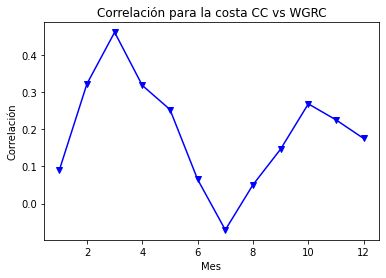

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(cor_field_field_space["time"],cor_field_field_space["density"],"v-b")
ax.set_xlabel("Mes")
ax.set_ylabel("Correlación")
ax.set_title("Correlación para la costa CC vs WGRC")

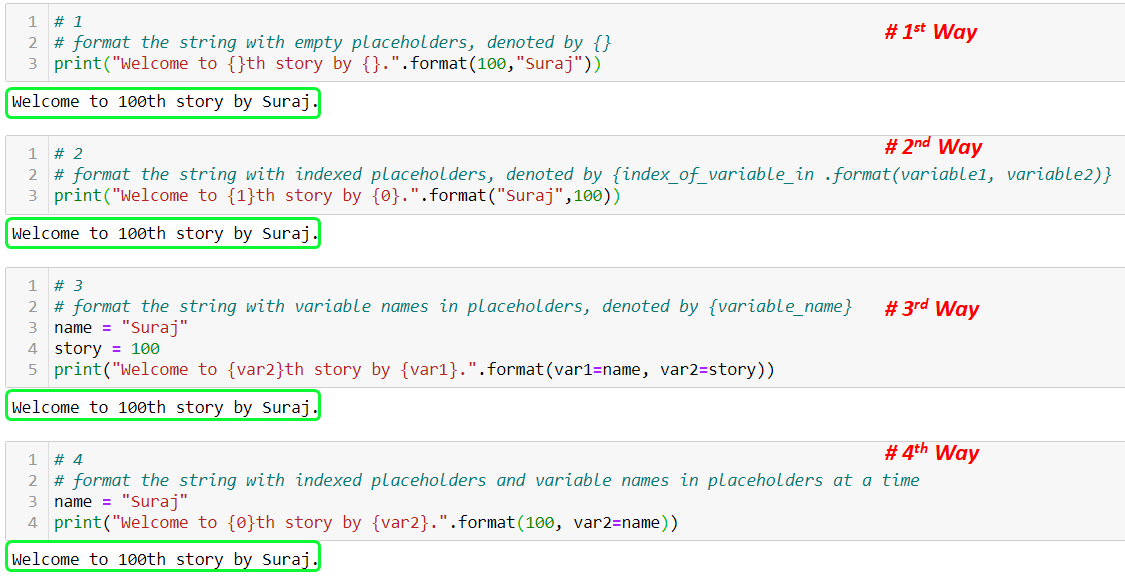